In [1]:
!pip install pyforest

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=2d0fad80fc9ac228adf14be8a2dabee912145001805e5465504c7fc079886b72
  Stored in directory: c:\users\vimat\appdata\local\pip\cache\wheels\d5\1a\3e\6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pyforest


In [8]:
data = pd.read_csv("titanic dataset.csv")
data

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
print(data.info())
print("="*45)
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin    

In [12]:
print(data.isna().sum())
print("="*50)
data = data.drop(['Name','Ticket','Cabin'],axis=1)
data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,NaN,0,0,8.0500,S


In [13]:
print(data['Age'].median())

27.0


In [14]:
print("="*50)
data['Age'] = data['Age'].fillna(value=27)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,27.0,0,0,8.0500,S


In [15]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [16]:
print(data['Fare'].median())

14.4542


In [17]:
data['Fare'] = data['Fare'].fillna(value=14.45)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,27.0,0,0,8.0500,S


In [18]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
#import label encoder
from sklearn import preprocessing

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#Encoder labels in column 'transmission'
data['Sex'] = label_encoder.fit_transform(data['Sex'])

print(data['Sex'].value_counts()) #converting

data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

print(data['Embarked'].value_counts()) #converting

1    266
0    152
Name: Sex, dtype: int64
2    270
0    102
1     46
Name: Embarked, dtype: int64


In [21]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,8.0500,2
414,1306,1,1,0,39.0,0,0,108.9000,0
415,1307,0,3,1,38.5,0,0,7.2500,2
416,1308,0,3,1,27.0,0,0,8.0500,2


<IPython.core.display.Javascript object>

C:\Users\vimat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

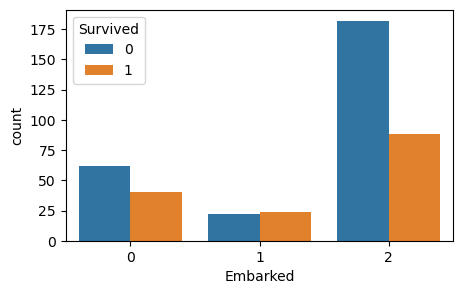

In [23]:
sns.countplot(data['Embarked'],hue=data['Survived'])
plt.gcf().set_size_inches(5,3) #get current figure
plt.show()

In [24]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,0.023245,-0.031447,0.003818,0.043080,0.008633,0.040699
Survived,-0.023245,1.000000,-0.108615,-1.000000,0.008035,0.099943,0.159120,0.192036,-0.076281
Pclass,-0.026751,-0.108615,1.000000,0.108615,-0.467853,0.001087,0.018721,-0.577313,0.227983
Sex,0.023245,-1.000000,0.108615,1.000000,-0.008035,-0.099943,-0.159120,-0.192036,0.076281
Age,-0.031447,0.008035,-0.467853,-0.008035,1.000000,-0.071197,-0.043731,0.342356,-0.148051
SibSp,0.003818,0.099943,0.001087,-0.099943,-0.071197,1.000000,0.306895,0.171912,0.052708
Parch,0.043080,0.159120,0.018721,-0.159120,-0.043731,0.306895,1.000000,0.230325,0.054577
Fare,0.008633,0.192036,-0.577313,-0.192036,0.342356,0.171912,0.230325,1.000000,-0.257624
Embarked,0.040699,-0.076281,0.227983,0.076281,-0.148051,0.052708,0.054577,-0.257624,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

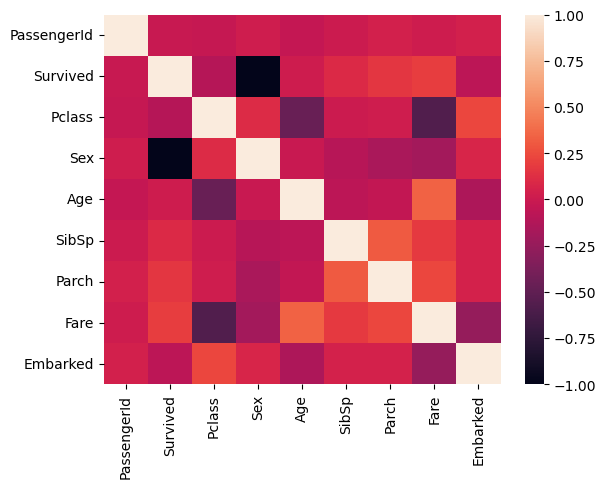

In [25]:
sns.heatmap(data.corr())

In [26]:
data['Family'] = data['SibSp']+data['Parch']
data= data.drop(['SibSp','Parch'],axis=1)
data= data.drop(['PassengerId','Embarked'],axis=1)
data

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,1,34.5,7.8292,0
1,1,3,0,47.0,7.0000,1
2,0,2,1,62.0,9.6875,0
3,0,3,1,27.0,8.6625,0
4,1,3,0,22.0,12.2875,2
...,...,...,...,...,...,...
413,0,3,1,27.0,8.0500,0
414,1,1,0,39.0,108.9000,0
415,0,3,1,38.5,7.2500,0
416,0,3,1,27.0,8.0500,0


In [29]:
data.tail(20)

,Survived,Pclass,Sex,Age,Fare,Family
398,0,3,1,22.0,7.7750,0
399,0,3,1,31.0,7.7333,0
400,1,1,0,30.0,164.8667,0
401,0,2,1,38.0,21.0000,1
402,1,1,0,22.0,59.4000,1
403,0,1,1,17.0,47.1000,0
404,0,1,1,43.0,27.7208,1
405,0,2,1,20.0,13.8625,0
406,0,2,1,23.0,10.5000,1
407,0,1,1,50.0,211.5000,2


In [30]:
a= data.drop('Survived',axis=1).values
b=data['Survived'].values

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.3,random_state=100)

In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
accuracy_score(y_test,lr.predict(x_test))

1.0